# Exploratory Data Analysis - "Terrorism"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [3]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding = 'latin1')
data.head()

/var/folders/24/dvylx_w14093bmzzjxgj93300000gn/T/ipykernel_94396/2530269917.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding = 'latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [21]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','summary':'Summary','attacktype1_txt':'Attacktype','weaptype1_txt':'Weapon','nkill':'Kill','nwound':'Wound','targtype1_txt':'Targettype'},inplace=True)

In [22]:
data1=data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','Summary','Group','Weapon','motive','Kill','Wound','Attacktype','Targettype','target1']]


In [23]:
data1.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Summary,Group,Weapon,motive,Kill,Wound,Attacktype,Targettype,target1
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,MANO-D,Unknown,NaN,1.0,0.0,Assassination,Private Citizens & Property,Julio Guzman
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,NaN,23rd of September Communist League,Unknown,NaN,0.0,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter"
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,NaN,Unknown,Unknown,NaN,1.0,0.0,Assassination,Journalists & Media,Employee
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,NaN,Unknown,Explosives,NaN,NaN,NaN,Bombing/Explosion,Government (Diplomatic),U.S. Embassy
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,NaN,Unknown,Incendiary,NaN,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate


In [24]:
data1.shape

(181691, 18)

In [25]:
data1.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
Summary        66129
Group              0
Weapon             0
motive        131130
Kill           10313
Wound          16311
Attacktype         0
Targettype         0
target1          636
dtype: int64

In [27]:
data1.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


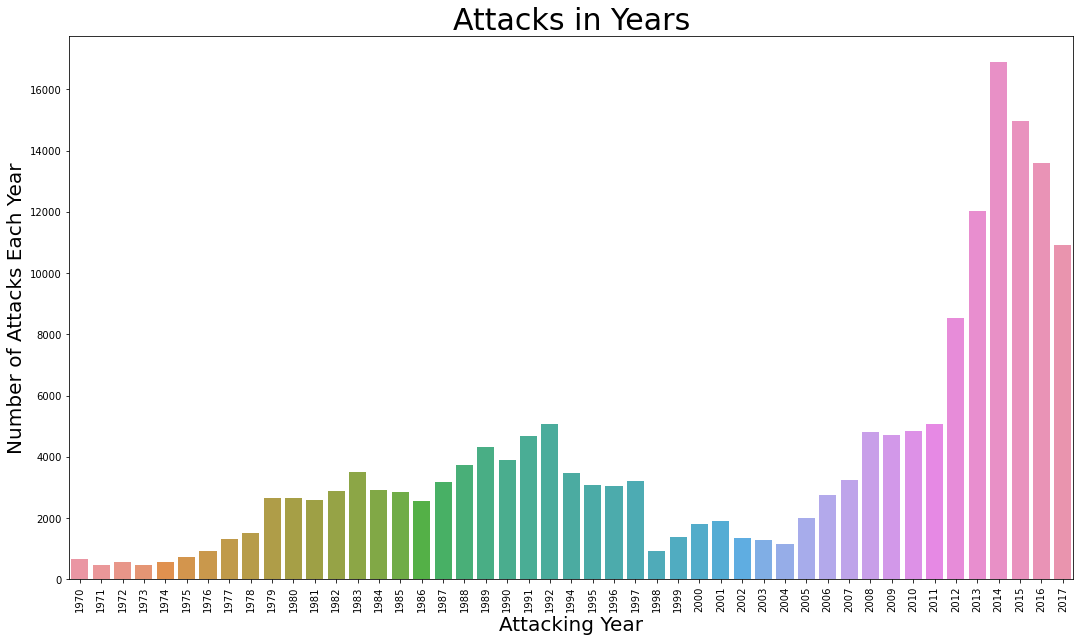

In [41]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count)
plt.xticks(rotation = 90)
plt.xlabel('Attacking Year',fontsize = 20)
plt.ylabel('Number of Attacks Each Year',fontsize = 20)
plt.title('Attacks in Years',fontsize = 30)
plt.show()

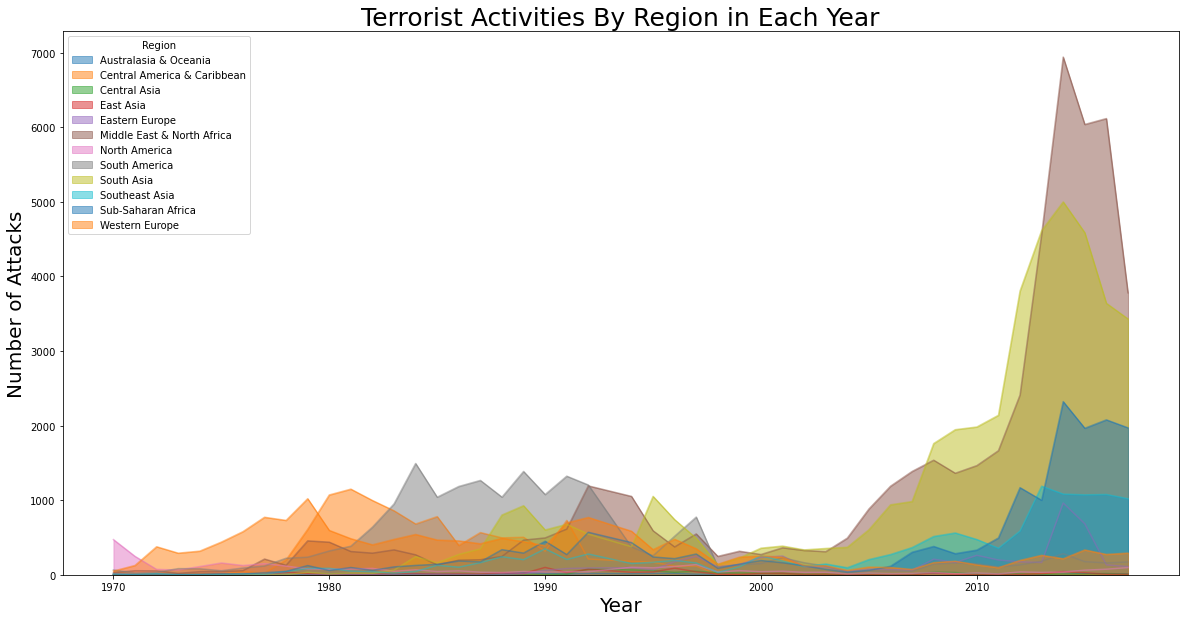

In [83]:
pd.crosstab(data1.Year,data1.Region).plot(kind = 'area',stacked = False, figsize = (20,10))
plt.title('Terrorist Activities By Region in Each Year',fontsize = 25)
plt.ylabel('Number of Attacks',fontsize = 20)
plt.xlabel('Year',fontsize =20)
plt.show()

In [43]:
attack = data1.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [44]:
data1.Group.value_counts()[1:10]


Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

/Users/devimanognapunnapu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


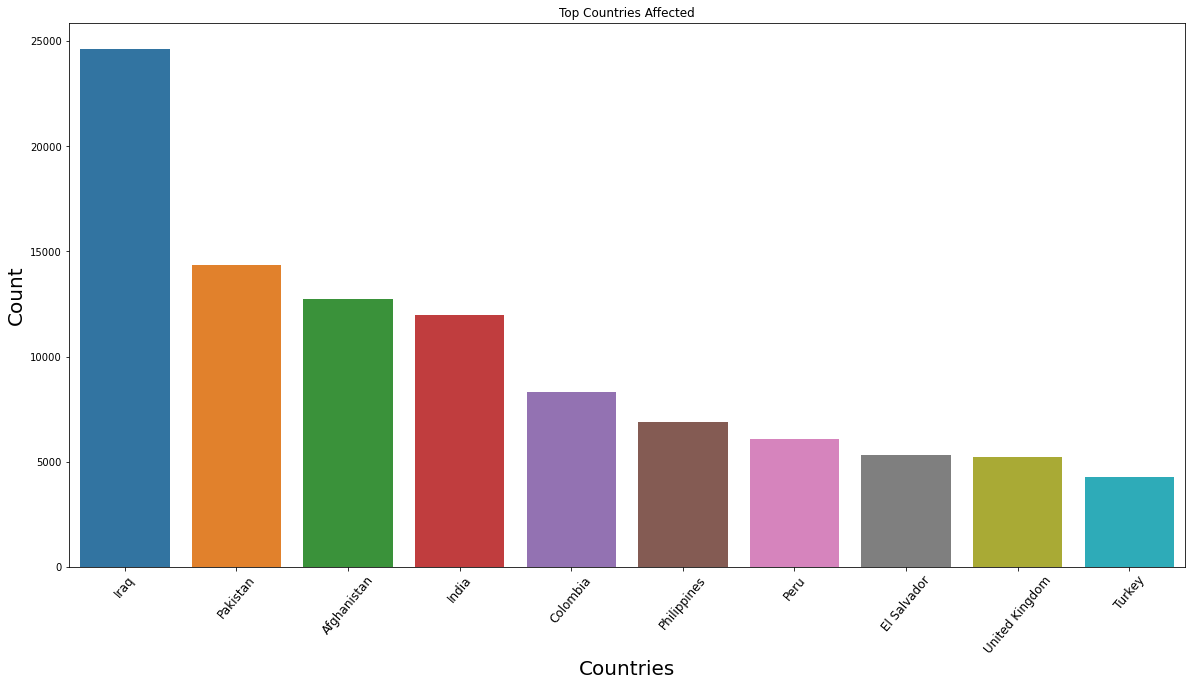

In [49]:
plt.subplots(figsize=(20,10))
sns.barplot(data1['Country'].value_counts()[:10].index,data1['Country'].value_counts()[:10].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.show()

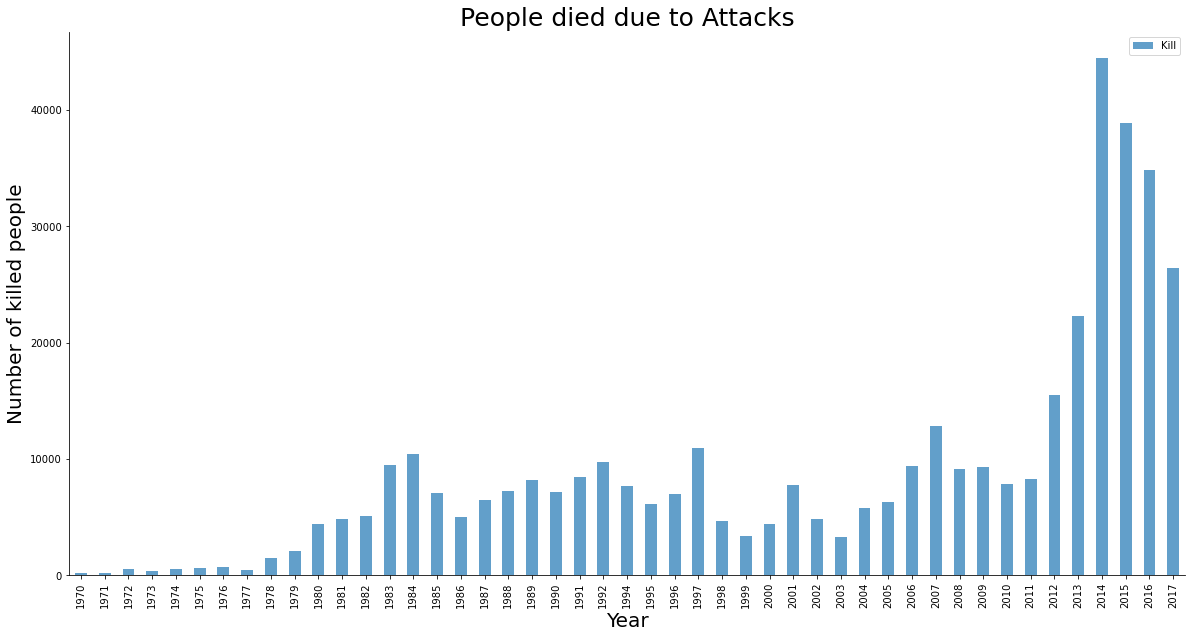

In [50]:
df = data1[['Year','Kill']].groupby(['Year']).sum()
fig,ax4 = plt.subplots(figsize = (20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation=90)
plt.title('People died due to Attacks',fontsize = 25)
plt.xlabel('Year',fontsize =20)
plt.ylabel('Number of killed people',fontsize =20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

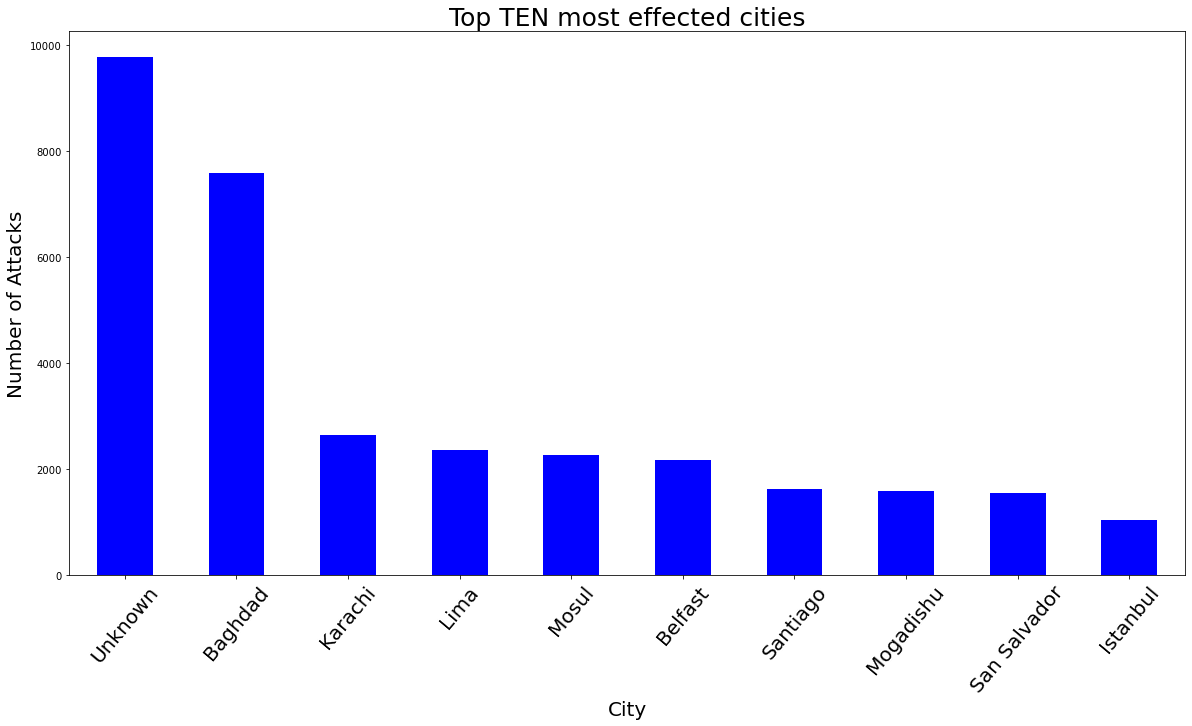

In [60]:
fd=data1['City'].value_counts().head(10)
fd.plot(kind='bar',figsize=(20,10),color = 'blue')
plt.xticks(rotation = 50,fontsize = 20)
plt.xlabel('City',fontsize =20)
plt.ylabel('Number of Attacks',fontsize =20)
plt.title('Top TEN most effected cities',fontsize =25)
plt.show()

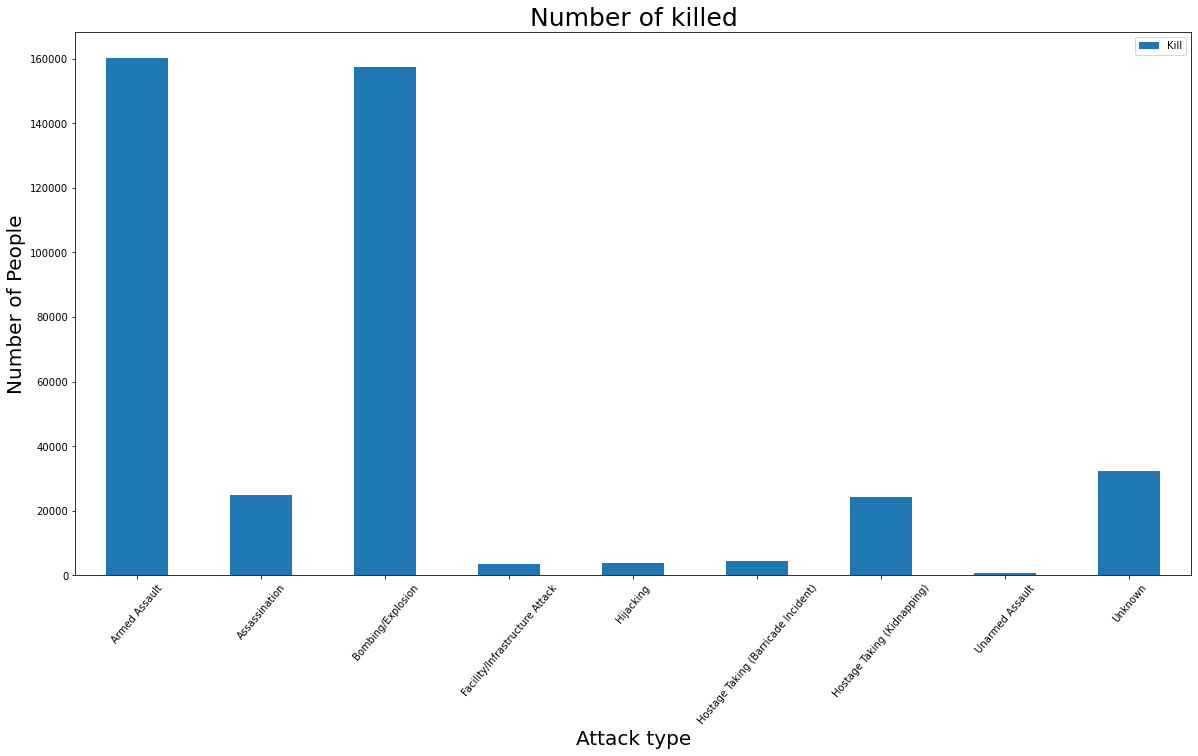

In [61]:
data1[['Attacktype','Kill']].groupby(["Attacktype"],axis=0).sum().plot(kind = 'bar',figsize=(20,10))
plt.xticks(rotation = 50)
plt.xlabel('Attack type',fontsize =20)
plt.ylabel('Number of People',fontsize=20)
plt.title("Number of killed",fontsize=25)
plt.show()


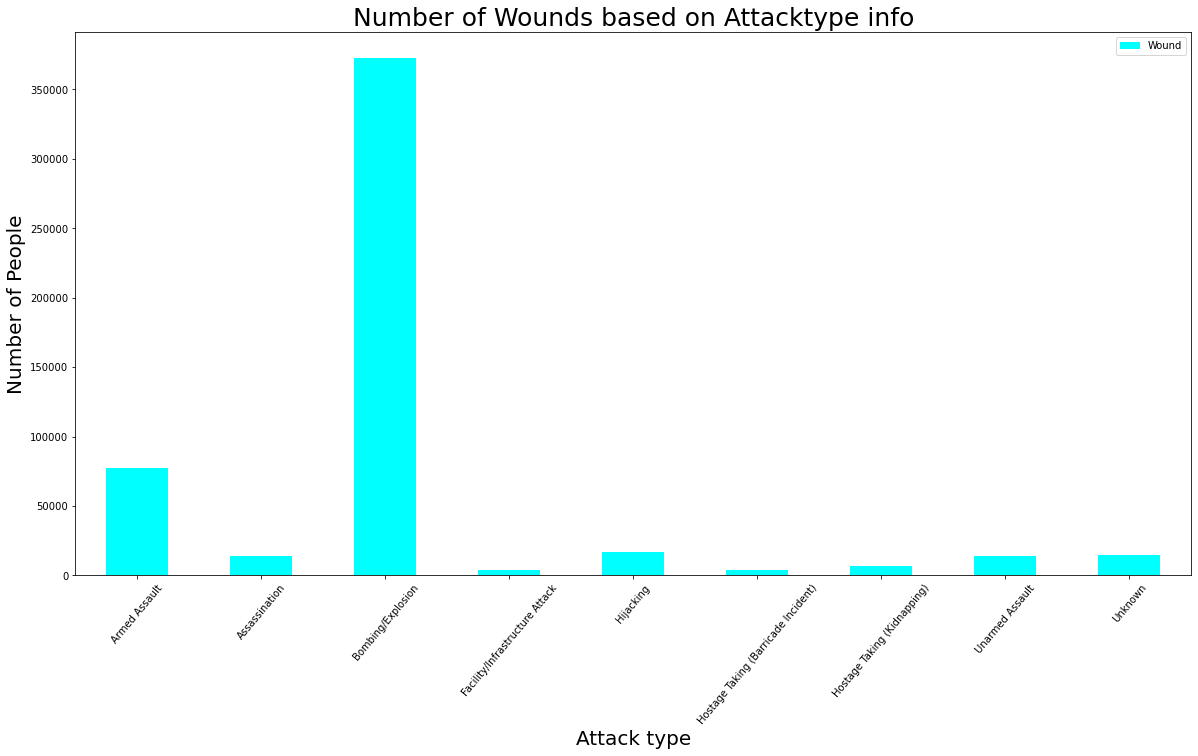

In [63]:
new=data1[['Attacktype','Wound']].groupby(['Attacktype'],axis=0).sum()
new.plot(kind='bar',figsize=(20,10),color=['cyan'])
plt.xticks(rotation = 50)
plt.xlabel('Attack type',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title("Number of Wounds based on Attacktype info",fontsize=25)
plt.show()



/Users/devimanognapunnapu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


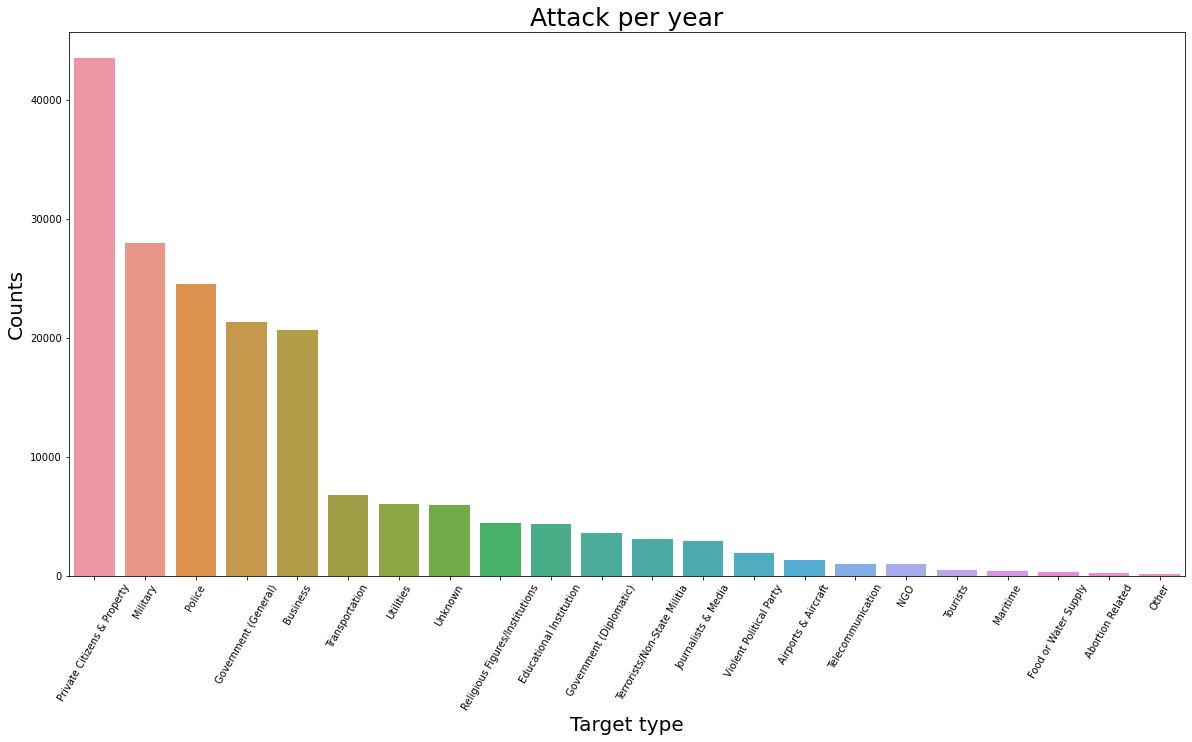

In [66]:
plt.subplots(figsize=(20,10))
sns.countplot(data1["Targettype"],order = data1['Targettype'].value_counts().index)
plt.xticks(rotation=60)
plt.xlabel("Target type",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Attack per year",fontsize=25)
plt.show()

In [79]:
kill = data1.loc[:,'Kill']
print("Number of people killed ny terror attacks:",int(sum(kill.dropna())))

Number of people killed ny terror attacks: 411868


In [80]:
typekill = data1.pivot_table(columns="Attacktype",values="Kill",aggfunc="sum")
typekill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [81]:
countrykill = data1.pivot_table(columns="Country",values="Kill",aggfunc="sum")
countrykill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


CONCLUSION AND RESULTS:

1. Maximum number of attacks were recorded in the year 2014
2. As per the area graph in the recent times after 2000 "South Asian" region recorded maximum attacks
3. Iraq is the top most country attacked by terrorist
4. According to the cities list 'Bhagdad' was effected the most, which was followed by Karachi and Lima
5. The most popular attack type which was chosen by terrorists are 'Armed Assault' and 'Bombing Explosion'
6. The maximum number of people wounded in the attacks are due to the attack type named - "Bombing Explosion"
7. Most targeted department by the terrorists in attacking was "Private clients and Property"